### Grabbing Data and Cleaning Data
* All code will be from Homework 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "C:/Users/aweso/OneDrive - Clark University/Year 3 Semester 2/DSCI 225 - Applied Machine Learning/Homework/Homework 2/cumulative.csv"
data = pd.read_csv(file_path)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
data = data.drop(['koi_pdisposition', 'koi_score'], axis = 1)

In [4]:
import re

columns = data.columns

err_columns = []
for i in columns:
  if re.search('err', i):
    err_columns.append(i)

data = data.drop(err_columns, axis = 1)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,0,0,0,0,9.488036,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,0,0,0,0,54.418383,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0,1,0,0,19.899140,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0,1,0,0,1.736952,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,0,0,0,0,2.525592,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [5]:
data.isna().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_time0bk             0
koi_impact            363
koi_duration            0
koi_depth             363
koi_prad              363
koi_teq               363
koi_insol             321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_slogg             363
koi_srad              363
ra                      0
dec                     0
koi_kepmag              1
dtype: int64

In [6]:
data.dropna(subset=['rowid', 'kepid', 'kepoi_name', 'koi_disposition',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag'], inplace=True, axis=0)

In [7]:
data.isna().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          6659
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_time0bk             0
koi_impact              0
koi_duration            0
koi_depth               0
koi_prad                0
koi_teq                 0
koi_insol               0
koi_model_snr           0
koi_tce_plnt_num        0
koi_tce_delivname       0
koi_steff               0
koi_slogg               0
koi_srad                0
ra                      0
dec                     0
koi_kepmag              0
dtype: int64

In [8]:
data = data.drop(['rowid', 'kepid'], axis = 1)

In [9]:
y = data['koi_disposition'] == 'CONFIRMED'
data['koi_disposition'] = y

In [10]:
data = data.drop(['kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('koi_disposition', axis = 1)
y = data['koi_disposition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

smote = SMOTE(sampling_strategy='minority')
SMOTE_X_train, SMOTE_y_train =smote.fit_resample(X_train_scaled, y_train)
SMOTE_X_test, SMOTE_y_test = smote.fit_resample(X_test_scaled, y_test)


| Variable Name      | Definition                                                                 |
|--------------------|----------------------------------------------------------------------------|
| koi_disposition    | Disposition of the Kepler Object of Interest (KOI)                         |
| koi_fpflag_nt      | KOI false positive flag - not transit-like                                 |
| koi_fpflag_ss      | KOI false positive flag - stellar eclipse                                  |
| koi_fpflag_co      | KOI false positive flag - centroid offset                                  |
| koi_fpflag_ec      | KOI false positive flag - ephemeris match indicates contamination          |
| koi_period         | Orbital period of the planet candidate                                     |
| koi_time0bk        | Transit epoch in Barycentric Julian Date (BJD)                             |
| koi_impact         | Impact parameter                                                           |
| koi_duration       | Duration of the transit                                                    |
| koi_depth          | Depth of the transit                                                       |
| koi_prad           | Radius of the planet candidate                                             |
| koi_teq            | Equilibrium temperature of the planet candidate                            |
| koi_insol          | Insolation flux received by the planet candidate                           |
| koi_model_snr      | Signal-to-noise ratio of the transit model                                 |
| koi_steff          | Effective temperature of the host star                                     |
| koi_slogg          | Surface gravity of the host star                                           |
| koi_srad           | Radius of the host star                                                    |
| ra                 | Right ascension of the host star                                           |
| dec                | Declination of the host star                                               |
| koi_kepmag         | Kepler magnitude of the host star                                          |

### Making the Neural Network
* Some code is copied from 10_neural_nets_with_keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score

In [ ]:
keras.backend.clear_session()

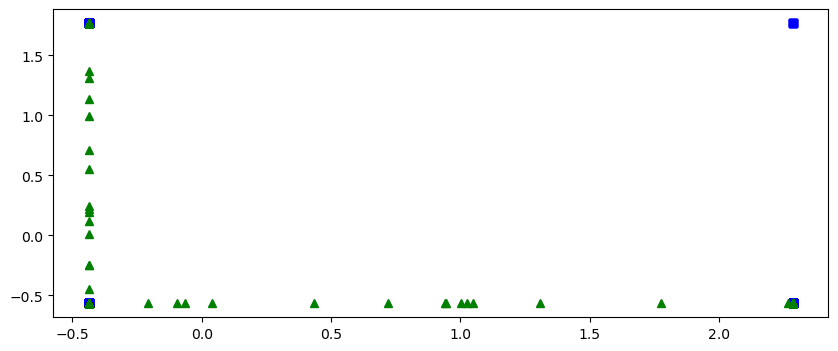

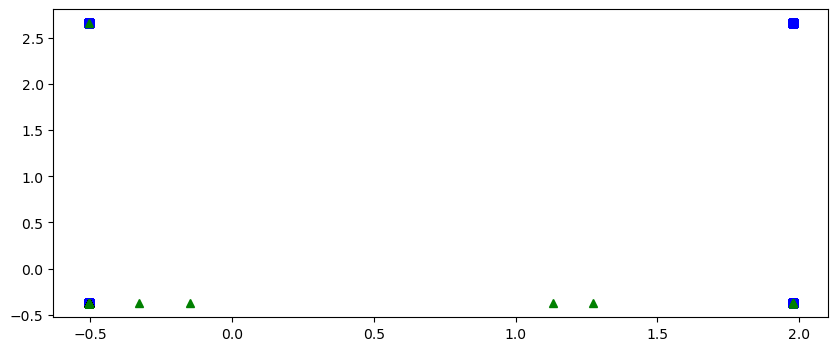

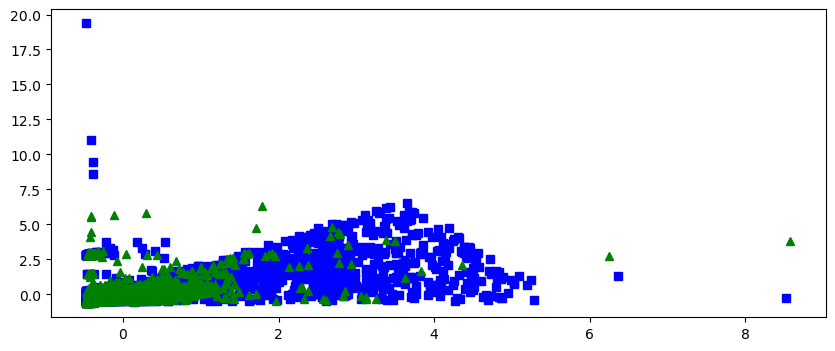

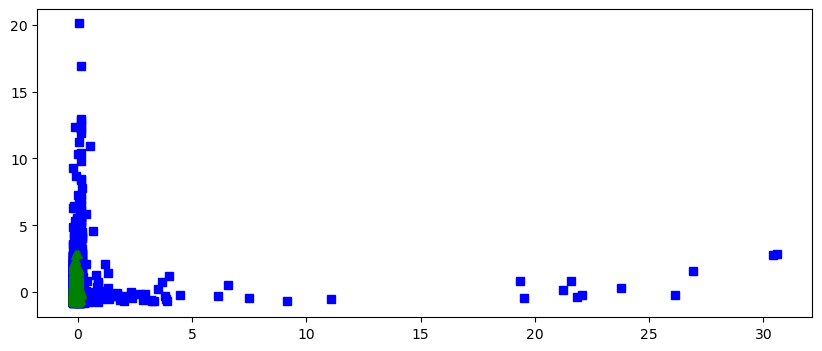

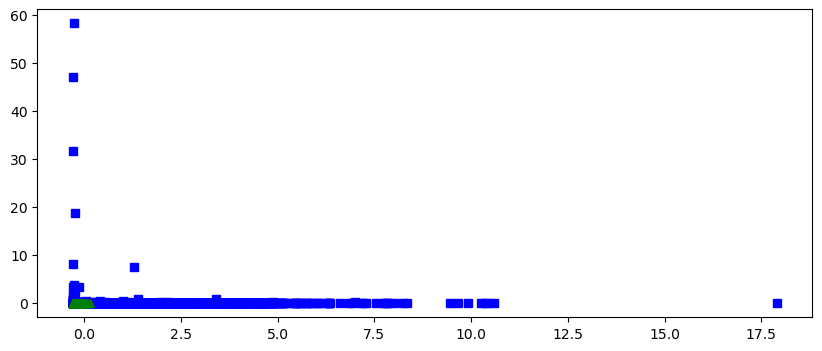

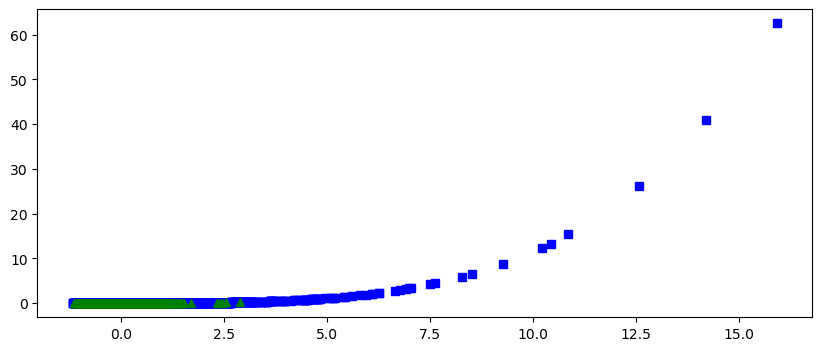

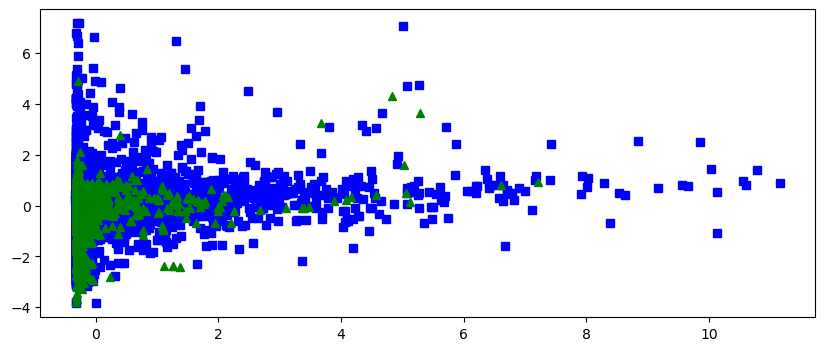

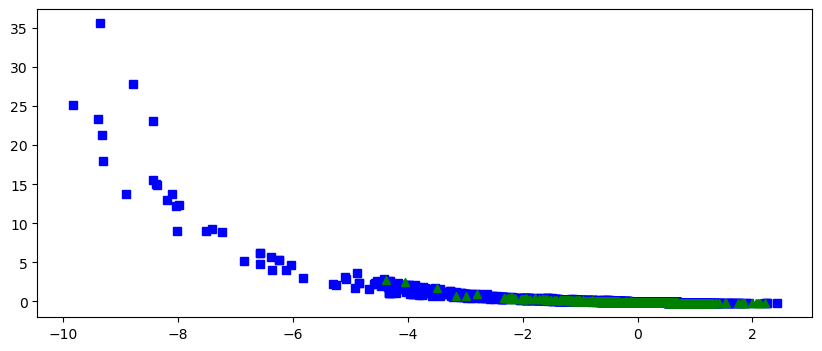

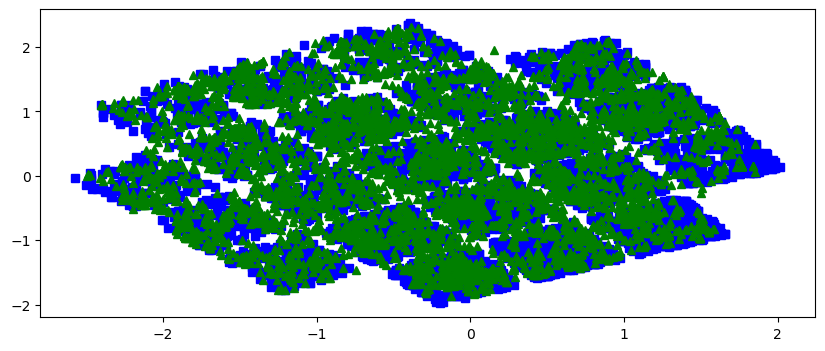

In [15]:
for i in range(0, SMOTE_X_train.shape[1] - 1, 2):  # Ensure i+2 does not exceed column count
   X_pair = SMOTE_X_train[:, i:i+2]
   plt.figure(figsize=(10, 4))
   plt.plot(X_pair[SMOTE_y_train == False, 0], X_pair[SMOTE_y_train == False, 1], "bs")
   plt.plot(X_pair[SMOTE_y_train == True, 0], X_pair[SMOTE_y_train == True, 1], "g^")
   plt.show()

#### Making Function to Create Confusion Matrix and Calculate Precision

In [29]:
def confusion_and_precision(model):
  y_pred = model.predict(SMOTE_X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  cm = confusion_matrix(SMOTE_y_test, y_pred_classes)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Confirmed", "Confirmed"])
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  precision = precision_score(SMOTE_y_test, y_pred_classes)
  print("Precision:", precision)

#### Initial Model

Epoch 1/30
334/334 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7416 - val_loss: 0.4494 - val_accuracy: 0.8121
Epoch 2/30
334/334 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8220 - val_loss: 0.3875 - val_accuracy: 0.8404
Epoch 3/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8382 - val_loss: 0.3666 - val_accuracy: 0.8483
Epoch 4/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8438 - val_loss: 0.3580 - val_accuracy: 0.8494
Epoch 5/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8448 - val_loss: 0.3532 - val_accuracy: 0.8509
Epoch 6/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8465 - val_loss: 0.3493 - val_accuracy: 0.8528
Epoch 7/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8484 - val_loss: 0.3461 - val_accuracy: 0.8502
Epoch 

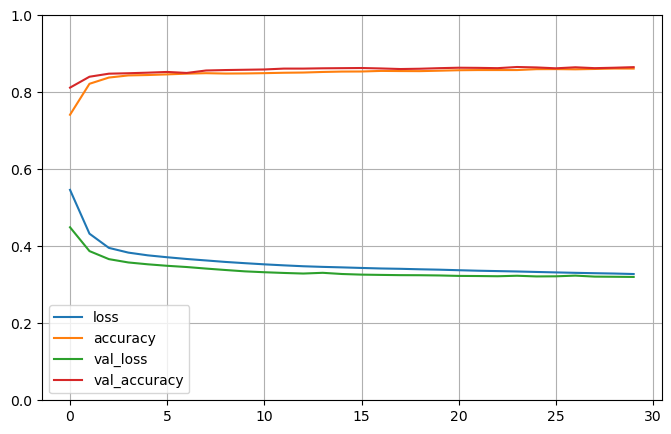

83/83 [==============================] - 0s 921us/step


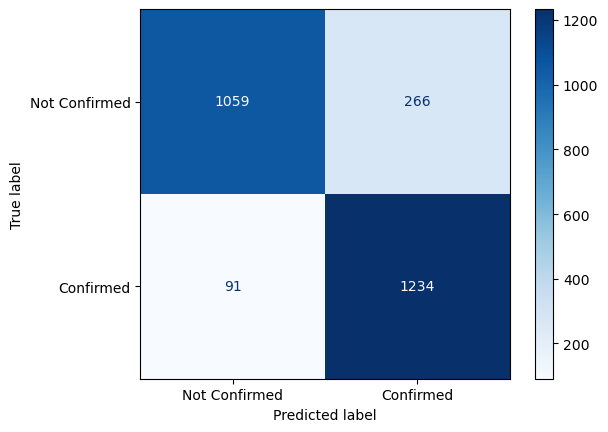

Precision: 0.8226666666666667


In [ ]:
keras.utils.set_random_seed(42)

model1 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(2, activation="softmax")
])

model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history1 = model1.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

confusion_and_precision(model1)

In [38]:
hidden1 = model1.layers[1]
weights, biases = hidden1.get_weights()

In [40]:
weights

array([[-5.89500591e-02,  2.10867539e-01, -1.48492664e-01,
        -3.99525970e-01, -2.32986167e-01,  2.98996001e-01,
         3.45270216e-01,  2.71048814e-01,  2.28828222e-01,
        -2.59733707e-01],
       [-6.00518249e-02,  5.64430580e-02, -4.52666521e-01,
         4.06688631e-01, -2.97872096e-01,  1.85773656e-01,
        -1.18441600e-02,  3.50533724e-01, -5.16344234e-02,
         2.01247677e-01],
       [ 6.42198622e-02, -8.85279328e-02, -2.96785414e-01,
         3.28327090e-01,  4.85790610e-01, -2.55416065e-01,
         3.58585805e-01,  3.95137846e-01,  1.89419948e-02,
         6.30102515e-01],
       [-4.14955080e-01,  5.70119247e-02,  2.17800401e-02,
         5.40848732e-01, -3.37037176e-01,  4.66411084e-01,
        -5.69087341e-02,  4.29663844e-02,  2.09794387e-01,
         2.58134544e-01],
       [ 1.61126316e-01,  3.80487144e-02, -6.24602556e-01,
        -3.78353208e-01,  1.21955924e-01,  3.12035859e-01,
        -2.40315780e-01,  3.13236177e-01,  4.50039774e-01,
         3.

#### PROBLEM: these weights are very small, one of the downsides of RELU, fix this by using ELU to make sure the neurons dont "die"

#### Second Model with Sigmoid Activation

Epoch 1/30
334/334 [==============================] - 3s 6ms/step - loss: 0.6967 - accuracy: 0.4739 - val_loss: 0.6910 - val_accuracy: 0.4940
Epoch 2/30
334/334 [==============================] - 1s 3ms/step - loss: 0.6890 - accuracy: 0.5225 - val_loss: 0.6838 - val_accuracy: 0.6608
Epoch 3/30
334/334 [==============================] - 1s 4ms/step - loss: 0.6816 - accuracy: 0.6281 - val_loss: 0.6760 - val_accuracy: 0.5396
Epoch 4/30
334/334 [==============================] - 1s 3ms/step - loss: 0.6737 - accuracy: 0.6349 - val_loss: 0.6664 - val_accuracy: 0.7562
Epoch 5/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6641 - accuracy: 0.7020 - val_loss: 0.6554 - val_accuracy: 0.7804
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6523 - accuracy: 0.7409 - val_loss: 0.6412 - val_accuracy: 0.7977
Epoch 7/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6372 - accuracy: 0.7679 - val_loss: 0.6235 - val_accuracy: 0.7792
Epoch 

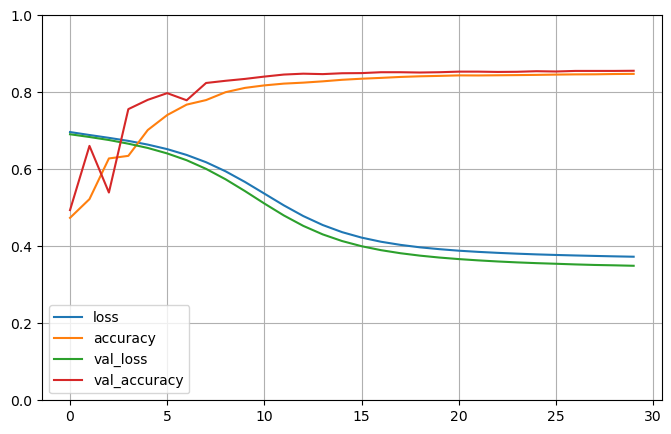

In [ ]:
keras.utils.set_random_seed(42)

model2 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(10, activation="sigmoid"),
  keras.layers.Dense(8, activation="sigmoid"),
  keras.layers.Dense(2, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["precision"])

history2 = model2.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

83/83 [==============================] - 0s 1ms/step


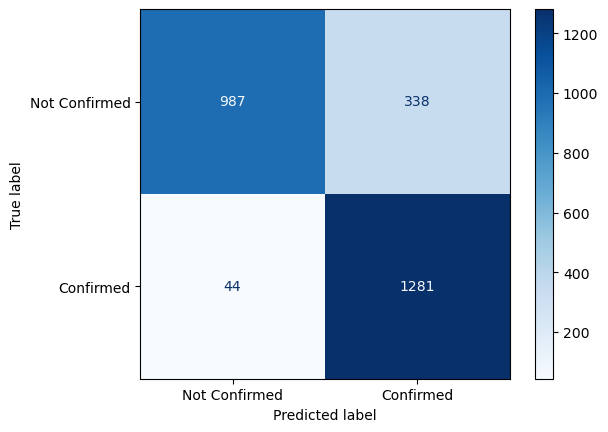

Precision: 0.7912291537986411


In [35]:
confusion_and_precision(model2)

#### Adding more nodes to both layers

Epoch 1/30
334/334 [==============================] - 2s 4ms/step - loss: 0.7143 - accuracy: 0.4466 - val_loss: 0.7009 - val_accuracy: 0.4030
Epoch 2/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.4341 - val_loss: 0.6966 - val_accuracy: 0.5098
Epoch 3/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5116 - val_loss: 0.6925 - val_accuracy: 0.4823
Epoch 4/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5575 - val_loss: 0.6871 - val_accuracy: 0.6158
Epoch 5/30
334/334 [==============================] - 1s 3ms/step - loss: 0.6846 - accuracy: 0.6297 - val_loss: 0.6819 - val_accuracy: 0.6543
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.6950 - val_loss: 0.6753 - val_accuracy: 0.7419
Epoch 7/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6718 - accuracy: 0.7408 - val_loss: 0.6678 - val_accuracy: 0.6868
Epoch 

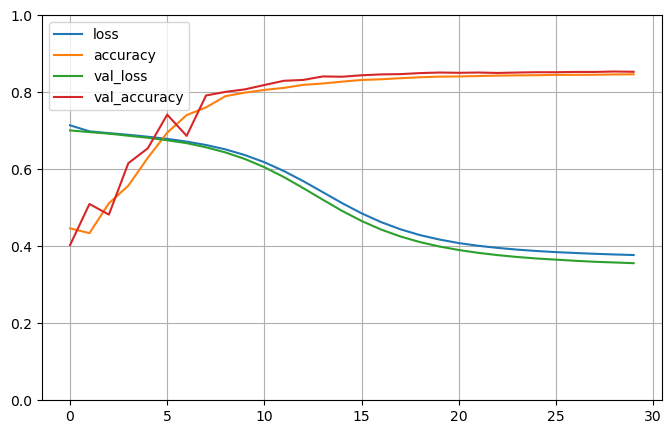

In [ ]:
keras.utils.set_random_seed(42)

model3 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(12, activation="sigmoid"),
  keras.layers.Dense(12, activation="sigmoid"),
  keras.layers.Dense(2, activation="softmax")
])

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["precision"])

history3 = model3.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

83/83 [==============================] - 0s 2ms/step


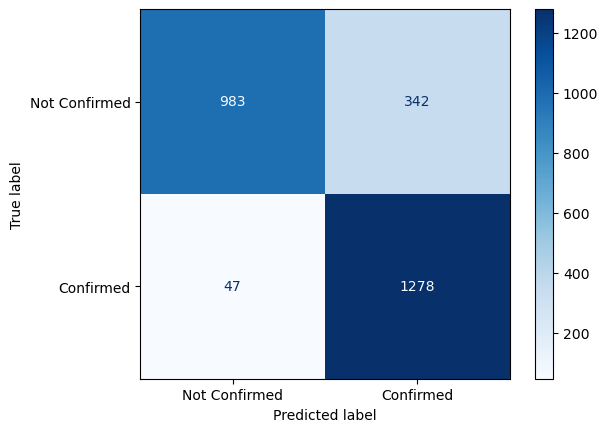

Precision: 0.7888888888888889


In [33]:
confusion_and_precision(model3)

Epoch 1/30
334/334 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7350 - val_loss: 0.4749 - val_accuracy: 0.8325
Epoch 2/30
334/334 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8383 - val_loss: 0.4005 - val_accuracy: 0.8498
Epoch 3/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8425 - val_loss: 0.3709 - val_accuracy: 0.8517
Epoch 4/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3807 - accuracy: 0.8447 - val_loss: 0.3579 - val_accuracy: 0.8540
Epoch 5/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8470 - val_loss: 0.3508 - val_accuracy: 0.8547
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3658 - accuracy: 0.8472 - val_loss: 0.3455 - val_accuracy: 0.8543
Epoch 7/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8483 - val_loss: 0.3421 - val_accuracy: 0.8540
Epoch 

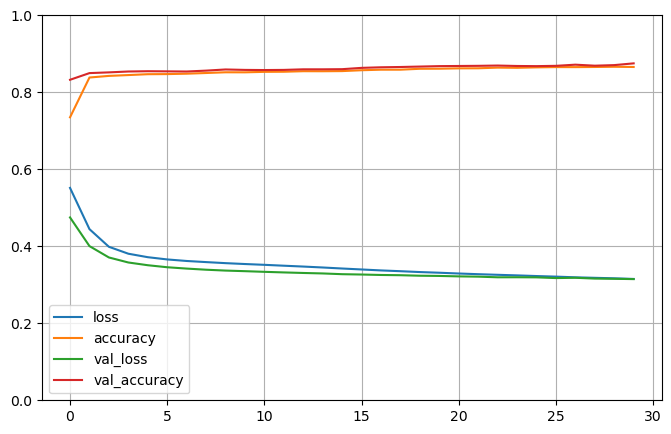

In [ ]:
keras.utils.set_random_seed(42)

model4 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(12, activation="relu"),
  keras.layers.Dense(12, activation="relu"),
  keras.layers.Dense(2, activation="softmax")
])

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["precision"])

history4 = model4.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

83/83 [==============================] - 0s 2ms/step


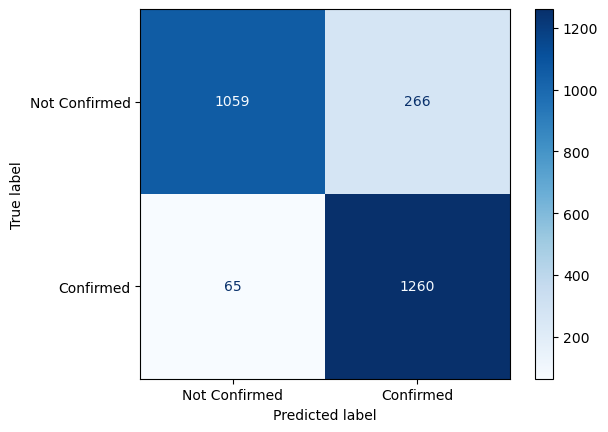

Precision: 0.8256880733944955


In [37]:
confusion_and_precision(model4)

#### Trying a new optimizer

Epoch 1/30
334/334 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7418 - val_loss: 0.3781 - val_accuracy: 0.8521
Epoch 2/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8431 - val_loss: 0.3430 - val_accuracy: 0.8532
Epoch 3/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8475 - val_loss: 0.3363 - val_accuracy: 0.8547
Epoch 4/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8495 - val_loss: 0.3344 - val_accuracy: 0.8558
Epoch 5/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8517 - val_loss: 0.3306 - val_accuracy: 0.8566
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8536 - val_loss: 0.3293 - val_accuracy: 0.8562
Epoch 7/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8556 - val_loss: 0.3348 - val_accuracy: 0.8566
Epoch 

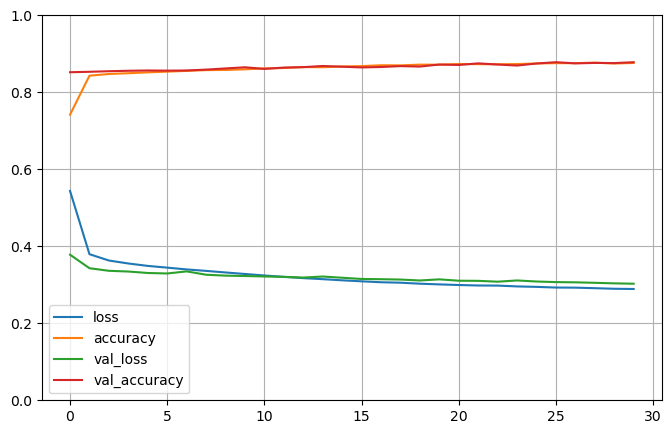

83/83 [==============================] - 0s 850us/step


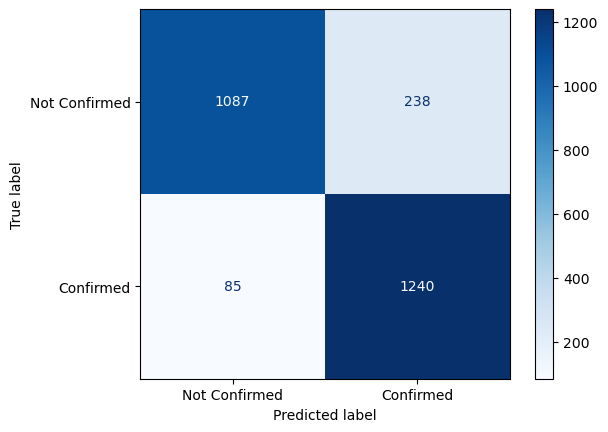

Precision: 0.8389715832205683


In [80]:
keras.utils.set_random_seed(42)

model5 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(2, activation="softmax")
])

model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history5 = model5.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test),
                    callbacks=[early_stopping_cb])

pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

confusion_and_precision(model5)

Epoch 1/30
334/334 [==============================] - 1s 2ms/step - loss: 0.5286 - precision_6: 0.5000 - val_loss: 0.3786 - val_precision_6: 0.5000
Epoch 2/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3793 - precision_6: 0.5000 - val_loss: 0.3427 - val_precision_6: 0.5000
Epoch 3/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3585 - precision_6: 0.5000 - val_loss: 0.3300 - val_precision_6: 0.5000
Epoch 4/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3479 - precision_6: 0.5000 - val_loss: 0.3258 - val_precision_6: 0.5000
Epoch 5/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3405 - precision_6: 0.5000 - val_loss: 0.3221 - val_precision_6: 0.5000
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3360 - precision_6: 0.5000 - val_loss: 0.3176 - val_precision_6: 0.5000
Epoch 7/30
334/334 [==============================] - 0s 1ms/step - loss: 0.3315 - precision_6: 0.5000 - val_los

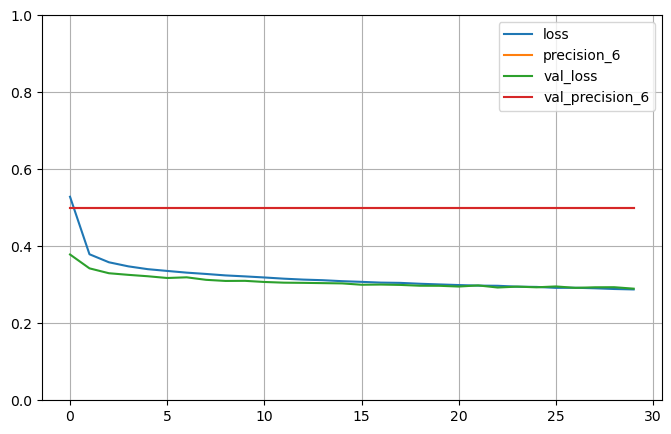

83/83 [==============================] - 0s 1ms/step


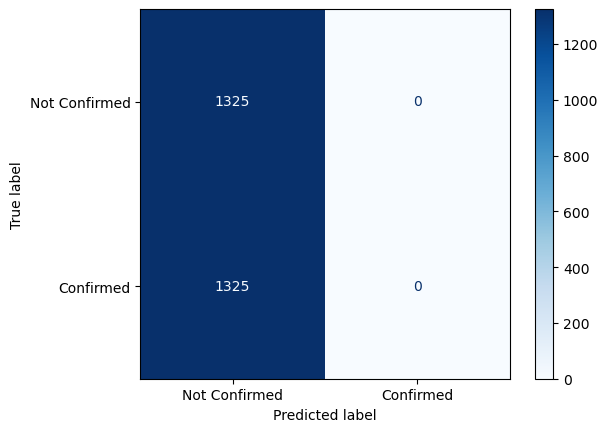

Precision: 0.0


c:\Users\aweso\anaconda3\envs\TensorFlowBase\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
keras.utils.set_random_seed(42)

model6 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1, activation="softmax")
])

model6.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=[keras.metrics.Precision()])

history6 = model6.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

confusion_and_precision(model5)

In [ ]:
#PROGRESS NOTES
#Problem 1: SMOTE did not work unless we changed the data to np.float64 since it can't handle mixed types
#Problem 2: When using relu, we encountered very small weights that had little to no impact on the model, so we tested out a sigmoid function to fix this
#Problem 3: There was a lot of fluctuation between epochs with different validation accuracy which we fixed using validation_split=0.2 withint the fit() command
#Problem 4: We noticed that the model was very reactive to learning rate changes when we were using sgd, so fixed this by trying out adam

#Investigation 1: 
#Investigation 2: We only used EarlyStopping in model 5, so how would the other models change/improve with using it? https://medium.com/@piyushkashyap045/early-stopping-in-deep-learning-a-simple-guide-to-prevent-overfitting-1073f56b493e 
#Investigation 3:
#Investigation 4: We were initially confused on what exactly keras.utils.set_random_seed() was doing and learned that it is important because it makes it easier to consistently reproduce across training runs
#Investigation 5: